In [18]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Industry).csv')
except FileNotFoundError:
    print("Error: 'SupplyChainEmissionFactorsforUSIndustriesCommodities(2015_Summary_Industry).csv' not found. Please make sure the file is in the same directory.")
    exit()

In [2]:
print("--- First 5 rows of the dataset ---")
print(df.head())

--- First 5 rows of the dataset ---
  Industry Code                              Industry Name       Substance  \
0         111CA                                      Farms  carbon dioxide   
1         111CA                                      Farms         methane   
2         111CA                                      Farms   nitrous oxide   
3         111CA                                      Farms      other GHGs   
4         113FF  Forestry, fishing, and related activities  carbon dioxide   

                                Unit  \
0       kg/2018 USD, purchaser price   
1       kg/2018 USD, purchaser price   
2       kg/2018 USD, purchaser price   
3  kg CO2e/2018 USD, purchaser price   
4       kg/2018 USD, purchaser price   

   Supply Chain Emission Factors without Margins  \
0                                          0.424   
1                                          0.023   
2                                          0.002   
3                                          0.0

In [4]:
print("--- Dataset Info ---")
print(df.info())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Industry Code                                           264 non-null    object 
 1   Industry Name                                           264 non-null    object 
 2   Substance                                               264 non-null    object 
 3   Unit                                                    264 non-null    object 
 4   Supply Chain Emission Factors without Margins           264 non-null    float64
 5   Margins of Supply Chain Emission Factors                264 non-null    float64
 6   Supply Chain Emission Factors with Margins              264 non-null    float64
 7   Unnamed: 7                                              0 non-null      float64
 8   DQ ReliabilityScore

In [5]:
print("--- Descriptive Statistics ---")
print(df.describe(include='all'))

--- Descriptive Statistics ---
       Industry Code Industry Name       Substance  \
count            264           264             264   
unique            66            66               4   
top            111CA         Farms  carbon dioxide   
freq               4             4              66   
mean             NaN           NaN             NaN   
std              NaN           NaN             NaN   
min              NaN           NaN             NaN   
25%              NaN           NaN             NaN   
50%              NaN           NaN             NaN   
75%              NaN           NaN             NaN   
max              NaN           NaN             NaN   

                                Unit  \
count                            264   
unique                             2   
top     kg/2018 USD, purchaser price   
freq                             198   
mean                             NaN   
std                              NaN   
min                              NaN   


In [20]:
#Rename Columns
df = df.rename(columns={'Industry Name': 'Industry', 'Supply Chain Emission Factors with Margins': 'Emissions'})

In [17]:
#handle missing values
df = df.dropna(subset=['Emissions'])

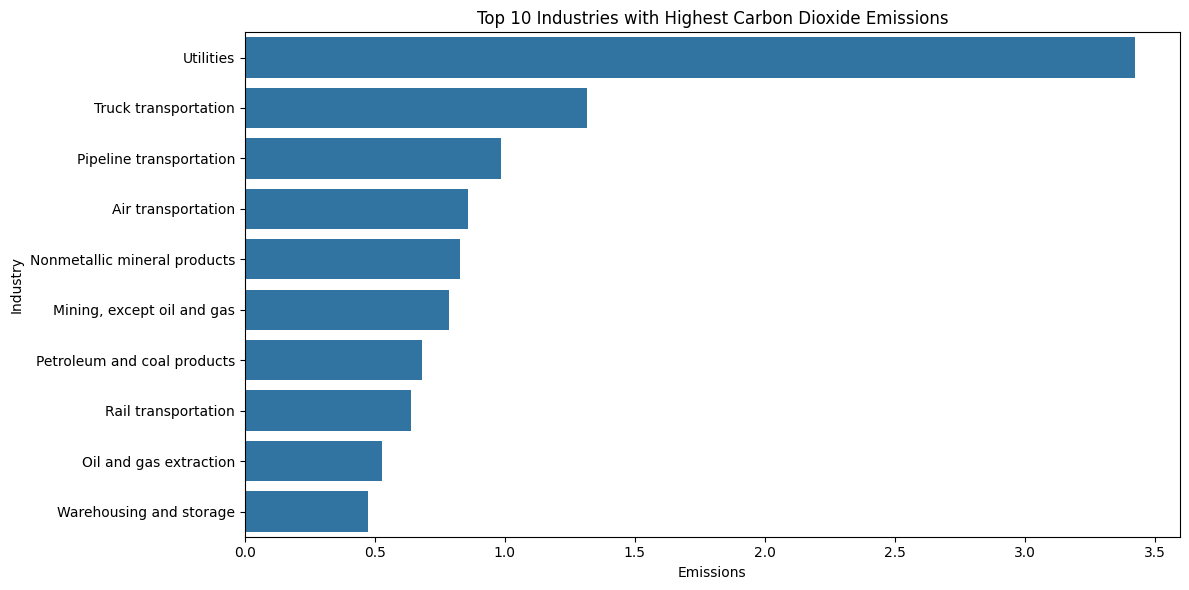

In [21]:
carbon_dioxide_emissions = df[df['Substance'] == 'carbon dioxide']
top_10_industries = carbon_dioxide_emissions.groupby('Industry')['Emissions'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_industries.values, y=top_10_industries.index)
plt.title('Top 10 Industries with Highest Carbon Dioxide Emissions')
plt.xlabel('Emissions')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

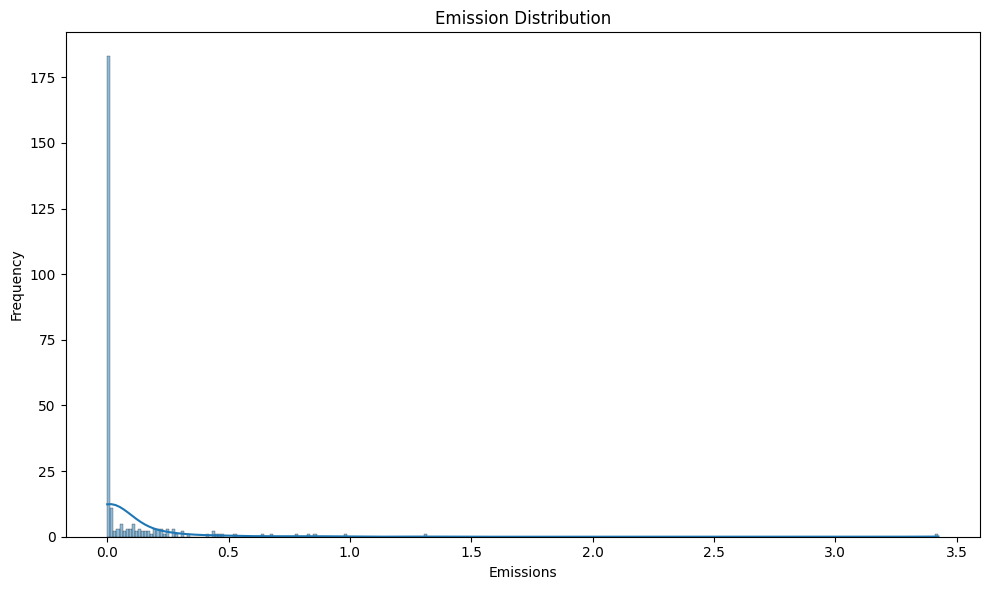

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Emissions'], kde=True)
plt.title('Emission Distribution')
plt.xlabel('Emissions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()